<a href="https://colab.research.google.com/github/midhun9633/IRIS-KNN-Algorithm/blob/main/iris_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Iris.csv')
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df=df.drop(['Id'],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.shape

(150, 5)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
x=df.iloc[:,:-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y=df.iloc[:,-1].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
#convert data set to training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x_train

array([[5. , 3.4, 1.6, 0.4],
       [5.8, 2.7, 5.1, 1.9],
       [5.8, 4. , 1.2, 0.2],
       [5.1, 3.8, 1.6, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [6. , 2.2, 5. , 1.5],
       [6.1, 3. , 4.9, 1.8],
       [7.1, 3. , 5.9, 2.1],
       [6.4, 2.8, 5.6, 2.1],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.9, 3.8, 6.4, 2. ],
       [5.8, 2.7, 3.9, 1.2],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [6.4, 3.2, 5.3, 2.3],
       [6.1, 2.9, 4.7, 1.4],
       [6.4, 2.8, 5.6, 2.2],
       [5.7, 2.5, 5. , 2. ],
       [7.4, 2.8, 6.1, 1.9],
       [6.6, 3. , 4.4, 1.4],
       [6. , 3.4, 4.5, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [5. , 3.5, 1.6, 0.6],
       [4.6, 3.2, 1.4, 0.2],
       [6.4, 2.7, 5.3, 1.9],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.6, 1. , 0.2],
       [6.1, 2.8, 4.7, 1.2],
       [7.7, 2.6, 6.9, 2.3],
       [5.1, 3.7, 1.5, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [6.5, 3. , 5.2, 2. ],
       [6.9, 3

In [ ]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[-0.54209118,  0.78418699, -1.32505953, -1.09109728],
       [ 0.07930155, -0.10597122,  0.7515263 ,  0.76099626],
       [-0.16925554, -0.32851077,  0.23237984,  0.09953428],
       [ 0.94925136, -0.32851077,  0.4631116 ,  0.09953428],
       [-0.54209118,  1.89688475, -1.20969365, -1.09109728],
       [-1.03920536,  1.00672655, -1.44042541, -1.22338968],
       [-1.1634839 ,  0.11656834, -1.32505953, -1.48797447],
       [-0.54209118,  1.45180565, -1.32505953, -1.35568207],
       [-1.78487663, -0.10597122, -1.44042541, -1.35568207],
       [-0.91492681,  0.56164744, -1.20969365, -0.95880488],
       [ 0.20358009, -0.77358987,  0.7515263 ,  0.49641146],
       [ 1.81920118, -0.32851077,  1.44372157,  0.76099626],
       [-0.16925554, -0.99612942, -0.17140073, -0.29734291],
       [-1.78487663,  0.33910789, -1.44042541, -1.35568207],
       [ 0.57641573, -0.55105032,  0.7515263 ,  0.36411907],
       [ 0.70069427, -0.32851077,  0.29006278,  0.09953428],
       [ 1.322087  ,  0.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

In [ ]:
print(classifier.predict([[7.1,3.0,5.9,2.1]]))

['Iris-virginica']


array([[17,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 14]])

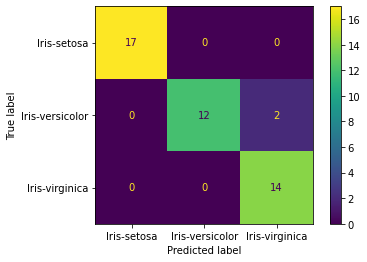

In [ ]:
#accuracy
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
label=['Iris-setosa','Iris-versicolor','Iris-virginica']
result=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(result,display_labels=label)
cmd.plot()
result

In [ ]:
#accuracy score 
score=accuracy_score(y_test,y_pred)
score

0.9555555555555556

how to display confusion matrix if it has 3 categories. if we have 3 or 4 we should display confusion matrix. for that import confusionmatrix display in [15]